In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [11]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df.shape

(150, 4)

In [14]:
df['target']=iris.target

In [15]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df[df.target==1].head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [17]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [18]:
import matplotlib.pyplot as plt

In [20]:
x = df.drop(['target'],axis='columns')
y = df.target

In [26]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.score(x_test,y_test)

0.9666666666666667

In [31]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
import numpy as np
y_test = np.array(y_test)

In [33]:
cm = confusion_matrix(y_pred,y_test)

In [34]:
cm

array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 11]], dtype=int64)

Text(0.5, 25.722222222222214, 'actual')

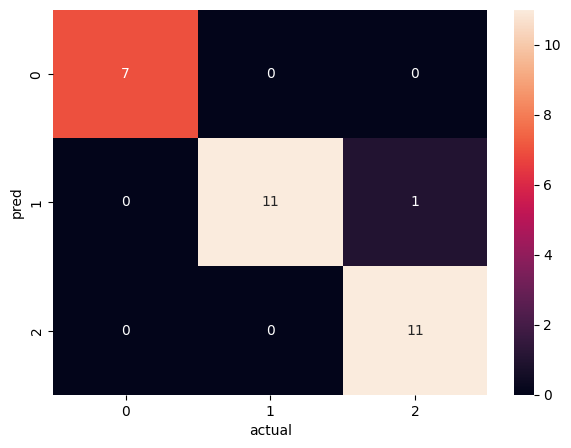

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.ylabel('pred')
plt.xlabel('actual')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

